## Noisy SAR acquisitions ##
+ Figure 12 - Automatic outlier detection for noisy acquisition based Median Absolute Deviation
+ Figure S7 - Estimated residual phase time-series

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mintpy.defaults.plot import *
from mintpy.objects import sensor
from mintpy.timeseries_rms import plot_rms_bar
from mintpy import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosAlosAT133/mintpy')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

proj_dir = work_dir
proj_name = sensor.project_name2sensor_name(proj_dir)[1]

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/mintpy


saved to file rms.pdf


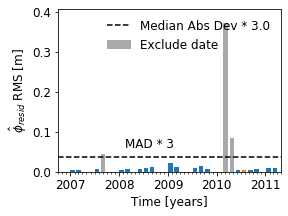

In [2]:
## Fig. 12a RMS time-series

# read data
rms_file = 'rms_timeseriesResidual_ramp.txt'
fc = np.loadtxt(rms_file, dtype=bytes).astype(str)
rms_list = fc[:, 1].astype(np.float).tolist()
date_list = list(fc[:, 0])

# plot
fig, ax = plt.subplots(figsize=[4,3])
ax = plot_rms_bar(ax, date_list, rms_list, disp_legend=False, disp_side_plot=False, disp_thres_text=False, ylabel=r'$\hat \phi_{resid}$ RMS [m]')
ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=False, left=True, right=False)
ax.annotate('MAD * 3', xy=(0.3, 0.15), color='k', xycoords='axes fraction', fontsize=font_size)
# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[2]], [labels[0], labels[2]], frameon=False, fontsize=font_size)

# output
out_file = 'rms.pdf'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('saved to file', out_file)
plt.show()

view.py /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/mintpy/velocityAll.h5 --dem /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/mintpy/inputs/geometryRadar.h5 --dem-nocontour --wrap --wrap-range -5 5 --notitle --fontsize 12 --nocbar --notick --nomultilook --ref-size 3 
run view.py in MintPy release version v1.1.2-93, release date 2019-07-23
input file is velocity file: /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/mintpy/velocityAll.h5 in float32 format
file size in y/x: (2900, 1400)
num of datasets in file velocityAll.h5: 2
datasets to exclude (0):
[]
datasets to display (2):
['velocity', 'velocityStd']
data   coverage in y/x: (0, 0, 1400, 2900)
subset coverage in y/x: (0, 0, 1400, 2900)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: jet
ascending orbit -> flip up-down
figure title: velocityAll_wrap10.0

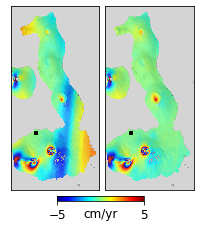

In [3]:
## Fig. 12b-c: Estimated Velocity with/without noisy SAR acquisitions

fnames = [os.path.join(proj_dir, i) for i in ['velocityAll.h5', 'velocity.h5']]
dem_file = os.path.join(proj_dir, 'inputs/geometryRadar.h5')

wrap_range = [-5, 5]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[3, 3])
for i in range(len(fnames)):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dem_file)
    cmd += '--wrap --wrap-range {} {} '.format(wrap_range[0], wrap_range[1])
    #cmd += '--scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 '
    cmd += '--notitle --fontsize 12 --nocbar --notick --nomultilook '
    cmd += '--ref-size 3 '
    data, atr, inps = view.prep_slice(cmd)
    im = view.plot_slice(axs.flatten()[i], data, atr, inps)[2]
plt.tight_layout(w_pad=-0.5)

# colorbar
fig.subplots_adjust(bottom=0.1)
cax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], wrap_range[1]], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('cm/yr', fontsize=font_size, labelpad=-14)

# output
out_file = 'velocity_compare.png'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('saved figure to {}'.format(out_file))
plt.show()

run view.py in MintPy release version v1.1.2-93, release date 2019-07-23
input file is timeseries file: /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/mintpy/timeseriesResidual_ramp.h5 in float32 format
file size in y/x: (2900, 1400)
num of datasets in file timeseriesResidual_ramp.h5: 22
datasets to exclude (0):
[]
datasets to display (22):
['timeseries-20070115', 'timeseries-20070302', 'timeseries-20070718', 'timeseries-20070902', 'timeseries-20080118', 'timeseries-20080304', 'timeseries-20080604', 'timeseries-20080720', 'timeseries-20080904', 'timeseries-20090120', 'timeseries-20090307', 'timeseries-20090723', 'timeseries-20090907', 'timeseries-20091023', 'timeseries-20100310', 'timeseries-20100425', 'timeseries-20100610', 'timeseries-20100726', 'timeseries-20100910', 'timeseries-20101026', 'timeseries-20110126', 'timeseries-20110313']
data   coverage in y/x: (0, 0, 1400, 2900)
subset coverage in y/x: (0, 0, 1400, 2900)
data   coverage in lat/lon: None
subset coverage in lat/lo

/Users/yunjunz/development/python/MintPy/mintpy/view.py:1387: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


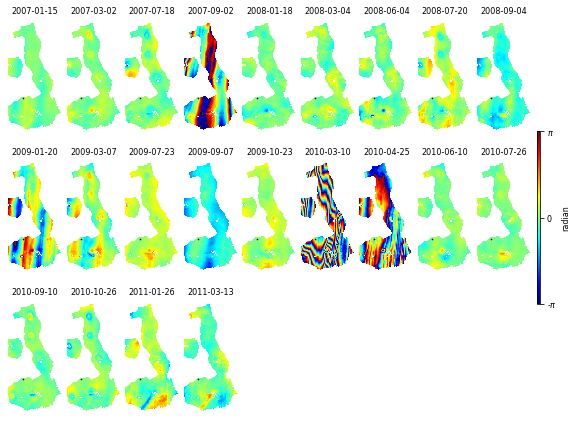

In [5]:
# Figure S7 - Phase Residual Time-Series
scp_args = 'timeseriesResidual_ramp.h5 --wrap --figsize 8 6 --fontsize 8 --nrows 3 --ncols 9 --nomultilook --noaxis --notick --no-tight-layout --save --dpi 600'
view.main(scp_args.split())